This demo uses the single-compartment model to show variability of purkinje cell complex spike

In [1]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt
from Units import *
from tqdm import tqdm

from Parameters_4 import *
from PC_four_channel import *

Change climbing fiber input value

In [4]:
# set model params
t_run=0.7
cs_duration=100*ms
cs_times = [400*ms]

res = []
for i,cf_current_value in enumerate(tqdm(np.arange(0,210,10))):
    # set the cf input
    cf_a=[cf_current_value*uA]*len(cs_times)

    # run the model
    i_e=Electrode(cs_times,cs_duration,cf_a)

    somatic_voltage=Somatic_voltage(c_soma,g_rna,g_k,g_sk,g_ca,g_leak,e_na,e_k,e_ca,e_leak,i_e,v_initial)
    f=All_derivatives(somatic_voltage,rna_states,rate_k,rate_sk,rate_ca,rate_ca_concentration)
    rna_y_initial=[rna_states.c1_initial,rna_states.c2_initial,0,0,0,0,0,0,0,0,0,0,0]
    y_initial=[somatic_voltage.v_initial,0]+rna_y_initial+[0,0,baseline_calcium_concentration]

    t0=0
    t1=t_run

    integrator = ode(f).set_integrator('vode', method='bdf', with_jacobian=False)
    integrator.set_initial_value(y_initial, t0)

    norm_n=10
    print_n=100

    norm_c=1
    print_c=1

    time_base = []
    voltage_trace = []

    while integrator.successful() and integrator.t < t1:

        integrator.integrate(integrator.t+dt)

        if norm_c==1:
            y=integrator.y
            y=normalize(y)
            integrator.set_initial_value(y,integrator.t)
            norm_c=norm_n

        if print_c==1:
            print_c=print_n
            time_base.append(integrator.t)
            voltage_trace.append(integrator.y[0])
        norm_c-=1
        print_c-=1


    # plot the complex spike
    time_base = np.array(time_base)
    voltage_trace = np.array(voltage_trace)

    res.append([time_base,voltage_trace])

    

100%|██████████| 21/21 [12:56<00:00, 36.98s/it]


<Figure size 640x480 with 0 Axes>

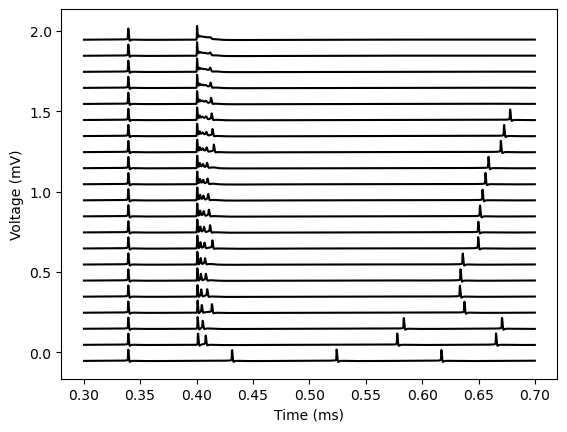

In [51]:
plt.figure()

# cmap
cmap = plt.get_cmap('hsv')
colors = [cmap(i) for i in np.linspace(0, 1, len(res))]


for i in range(len(res)):
    time_base = res[i][0]
    voltage_trace = res[i][1]
    plt.plot(time_base[time_base > 300*ms],voltage_trace[time_base > 300*ms] + i*100*mV,color = 'black')


plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')


plt.show()

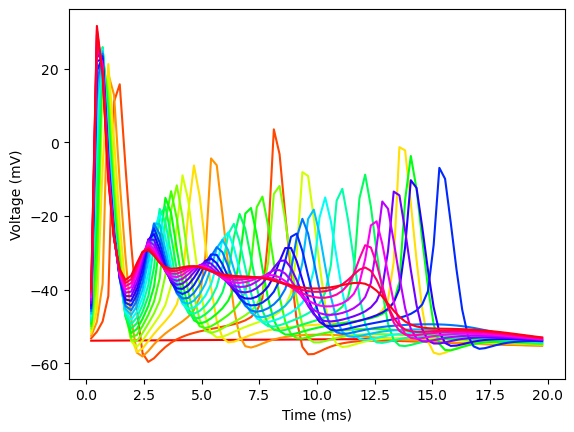

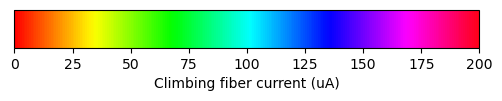

In [47]:
import matplotlib as mpl

plt.figure()

# cmap
cmap = plt.get_cmap('hsv')
colors = [cmap(i) for i in np.linspace(0, 1, len(res))]


for i in range(len(res)):
    time_base = res[i][0]
    voltage_trace = res[i][1]
    # plt.plot(time_base[time_base > 300*ms],voltage_trace[time_base > 300*ms],color = 'black', alpha = (i+1)/21)
    plt.plot((time_base[(time_base > 400*ms) * (time_base < 420*ms)]-400*ms)/ms,
             voltage_trace[(time_base > 400*ms) * (time_base < 420*ms)]/mV,
             color = colors[i])

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.get_cmap('hsv')
norm = mpl.colors.Normalize(vmin=0, vmax=200)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Climbing fiber current (uA)')

plt.show()

Change climbing fiber input duration
- cf_synapse=DoubleExponentialSynapse(tau_rise,tau_decay), the climbing fiber current input waveform shape is fixed, changing cs_duration not working very well

100%|██████████| 4/4 [01:58<00:00, 29.52s/it]


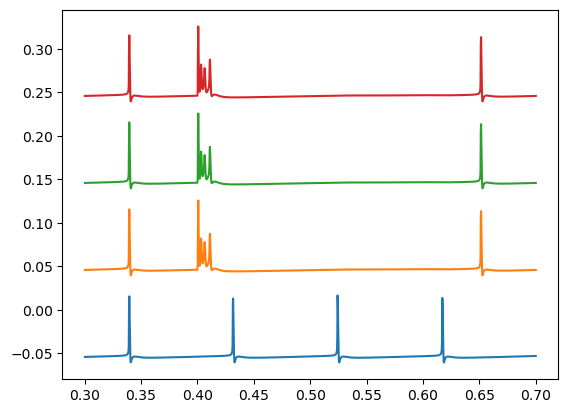

In [17]:
# set model params
t_run=0.7
cs_times = [400*ms]
cf_current_value = 90

plt.figure()

for i,cs_duration in enumerate(tqdm(np.arange(0,2,0.5))):
    # set the cf input
    cf_a=[cf_current_value*uA]*len(cs_times)

    # run the model
    i_e=Electrode(cs_times,cs_duration,cf_a)

    somatic_voltage=Somatic_voltage(c_soma,g_rna,g_k,g_sk,g_ca,g_leak,e_na,e_k,e_ca,e_leak,i_e,v_initial)
    f=All_derivatives(somatic_voltage,rna_states,rate_k,rate_sk,rate_ca,rate_ca_concentration)
    rna_y_initial=[rna_states.c1_initial,rna_states.c2_initial,0,0,0,0,0,0,0,0,0,0,0]
    y_initial=[somatic_voltage.v_initial,0]+rna_y_initial+[0,0,baseline_calcium_concentration]

    t0=0
    t1=t_run

    integrator = ode(f).set_integrator('vode', method='bdf', with_jacobian=False)
    integrator.set_initial_value(y_initial, t0)

    norm_n=10
    print_n=100

    norm_c=1
    print_c=1

    time_base = []
    voltage_trace = []

    while integrator.successful() and integrator.t < t1:

        integrator.integrate(integrator.t+dt)

        if norm_c==1:
            y=integrator.y
            y=normalize(y)
            integrator.set_initial_value(y,integrator.t)
            norm_c=norm_n

        if print_c==1:
            print_c=print_n
            time_base.append(integrator.t)
            voltage_trace.append(integrator.y[0])
        norm_c-=1
        print_c-=1


    # plot the complex spike
    time_base = np.array(time_base)
    voltage_trace = np.array(voltage_trace)

    plt.plot(time_base[time_base > 300*ms],voltage_trace[time_base > 300*ms] + i*100*mV)

plt.show()